In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from tqdm import tqdm

def simulate():
    num_iterations = 50_00
    Distance = 1_000
    theta = np.empty(num_iterations)
    xs = np.empty(num_iterations)
    ys = np.empty(num_iterations)
    vel1 = np.empty(num_iterations)
    vel2 = np.empty(num_iterations)
    
    dis = np.random.normal(1,0.1,300)
    centerz = np.random.uniform(0, 1000, 300)
    centerx = dis * np.cos(np.random.uniform(0, 2*np.pi, 300))
    centery = dis * np.sin(np.random.uniform(0, 2*np.pi, 300))    
    
    print(np.min(dis),np.max(dis))

    for i in tqdm(range(num_iterations)):
        loc = np.array([0.0, 0.0, 0.0])
        
        velr = np.random.uniform(0.5*10**(-11), 1.5*10**(-10))
        phi = np.random.uniform(0, 2*np.pi)
        
        velx = velr * np.cos(phi)
        vely = velr * np.sin(phi)

        vel = np.array([velx, vely, 1.0 - velx**2 - vely**2])
        vel_start = vel.copy()
            
        for j in range(Distance):
            acc = np.sum(1.558e-13 * np.array([centerx - loc[0], centery - loc[1], centerz - loc[2]]) / (
                (centerx - loc[0]) ** 2 + (centery - loc[1]) ** 2 + (centerz - loc[2]) ** 2) ** (3 / 2))
            vel += acc
            vel /= np.sqrt(vel[0]**2 + vel[1]**2 + vel[2]**2)
            loc += vel
            
        theta[i] = 3600 * 1e6 * np.arctan(np.sqrt((vel[0] - vel_start[0])**2 + (vel[1] - vel_start[1])**2 + (vel[2] - vel_start[2])**2))
        xs[i] = loc[0]
        ys[i] = loc[1]
        vel1[i] = velx
        vel2[i] = vely
        
    return theta, xs, ys, vel1, vel2

theta, xs, ys, vel1, vel2 = simulate()

0.7286414459959578 1.2333691584255846


100%|███████████████████████████████████████| 5000/5000 [02:19<00:00, 35.73it/s]


<Figure size 640x480 with 0 Axes>

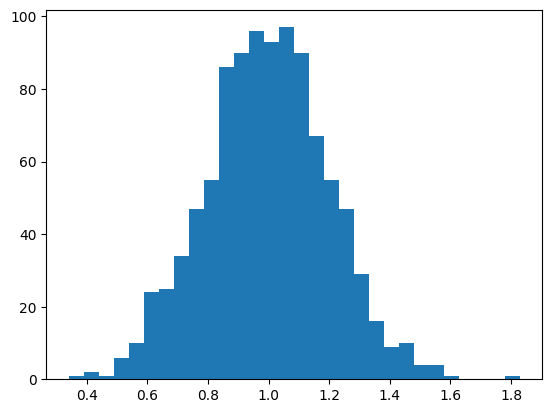

<Figure size 640x480 with 0 Axes>

In [3]:
plt.hist(np.random.normal(1,0.2,1000),bins = 30)
plt.figure()

In [4]:
velx = []
vely = []
red_theta = []
count1 = 0
count2 = 0
for i in range(len(xs)):
    if (np.sqrt(xs[i]**2 + ys[i]**2) < 10**(-7)):
        velx.append(vel1[i])
        vely.append(vel2[i])
        red_theta.append(theta[i])
        count1 += 1
    if (np.sqrt(vel1[i]**2 + vel2[i]**2) < 10**(-10)):
        count2 += 1
        
#print(np.sqrt(np.array(xs)**2 + np.array(ys)**2))

In [5]:
print(count1/count2-1)

-0.007151370679380209


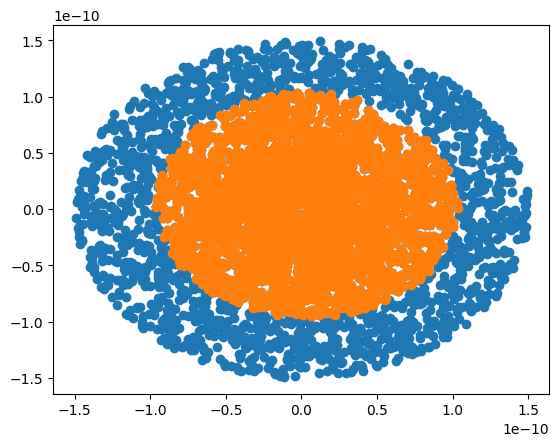

In [6]:
plt.scatter(vel1,vel2)
plt.scatter(velx,vely)

In [7]:
print(len(red_theta))

3332


<Figure size 640x480 with 0 Axes>

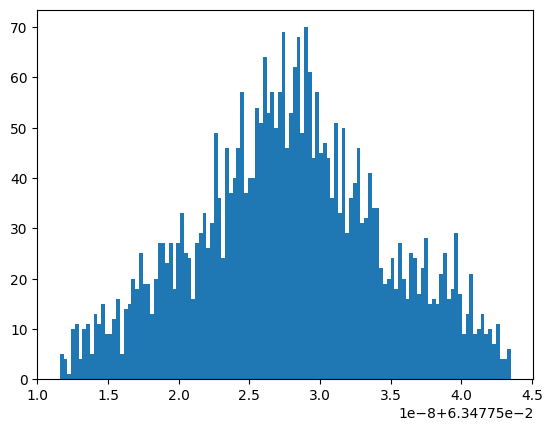

<Figure size 640x480 with 0 Axes>

In [8]:
plt.hist(red_theta,bins = 120)
plt.figure()

In [9]:
print(np.std(red_theta))

6.752593149412253e-09
